**Database Link**

In [ ]:
#https://www.kaggle.com/code/pkulaba1290/starter-graduate-admissions-91c64936-a/input

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/ml_labs_sem6

admission_predict.csv  nit_ranking.xlsx  reviews_data.gsheet  rvp_cleaned.csv
data.xlsx	       reviews_data.csv  round1_cleaned.csv   spam.csv


In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/ml_labs_sem6/admission_predict.csv")

In [5]:
df.shape

(500, 9)

In [6]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


**Listing all the features**

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**Data Summary**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


**Removing Null values**

In [9]:
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [10]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

**Data Projection**

In [11]:
from matplotlib import pyplot as plt

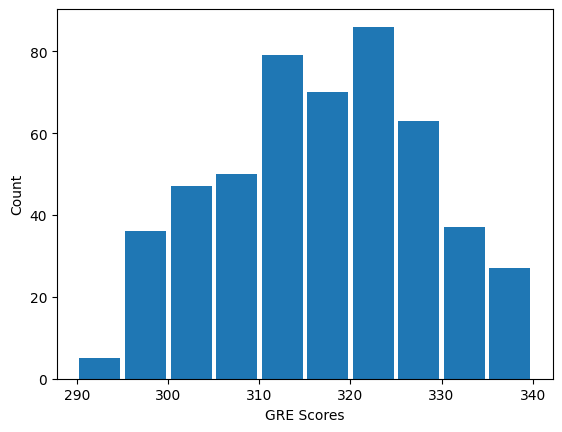

In [12]:
fig = plt.hist(df['GRE Score'], rwidth=0.9)
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

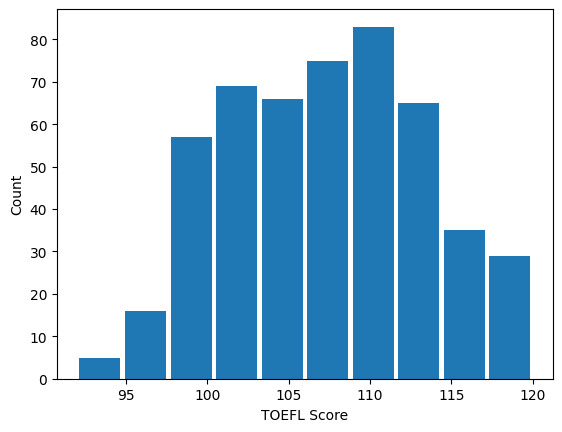

In [13]:
fig2 = plt.hist(df["TOEFL Score"], rwidth=0.9)
plt.xlabel("TOEFL Score")
plt.ylabel("Count")
plt.show()

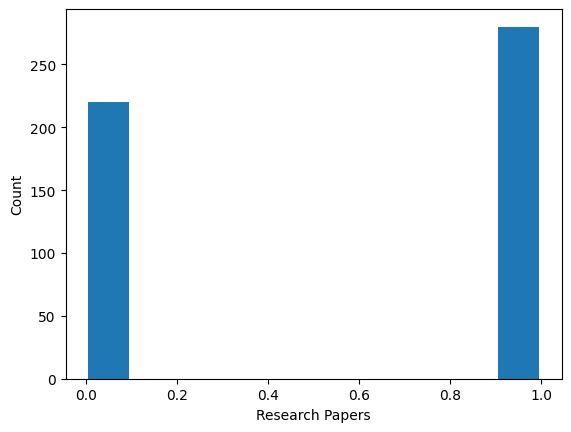

In [14]:
fig3 = plt.hist(df["Research"], rwidth=0.9)
plt.xlabel("Research Papers")
plt.ylabel("Count")
plt.show()

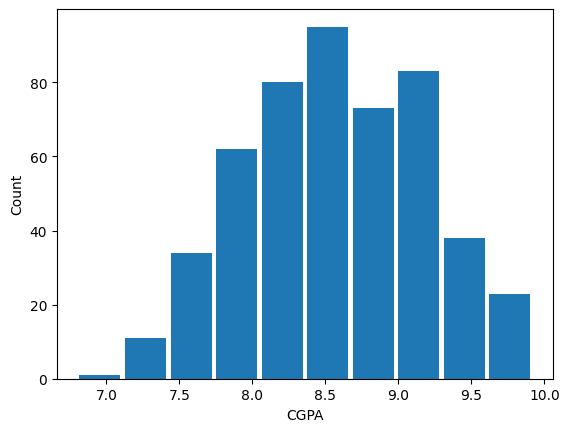

In [15]:
fig4 = plt.hist(df['CGPA'], rwidth=0.9)
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

Now since we have displayed the range of values of all the features , I got to know that **CGPA** displays maximum range of values.

**Data** **Cleaning**

In [16]:
df.drop(columns = "Serial No." , inplace=True)

In [17]:
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [18]:
df_copy = df.copy(deep=True)
df_copy[['GRE Score','TOEFL Score','University Rating','SOP','CGPA']] = df_copy[['GRE Score','TOEFL Score','University Rating','SOP','CGPA']].replace(0, np.NaN)
df_copy.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

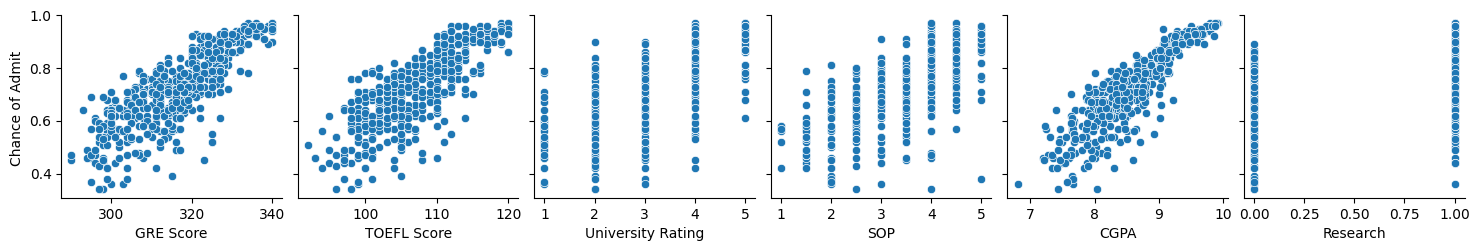

In [20]:
sns.pairplot(df,
            x_vars=["GRE Score", "TOEFL Score", "University Rating", "SOP","CGPA", "Research"],
            y_vars=["Chance of Admit "])
plt.show()

**Linear Regression**

In [21]:
x=df.drop(['Chance of Admit '],axis=1)
y=df['Chance of Admit ']

**Now , I will be training my model using Linear Regression first.**

In [22]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33, random_state=100)

In [23]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

In [24]:
from sklearn.metrics import r2_score , accuracy_score
score= r2_score(reg.predict(test_x),test_y)
y_pred = reg.predict(test_x)
score

0.8082585452743907

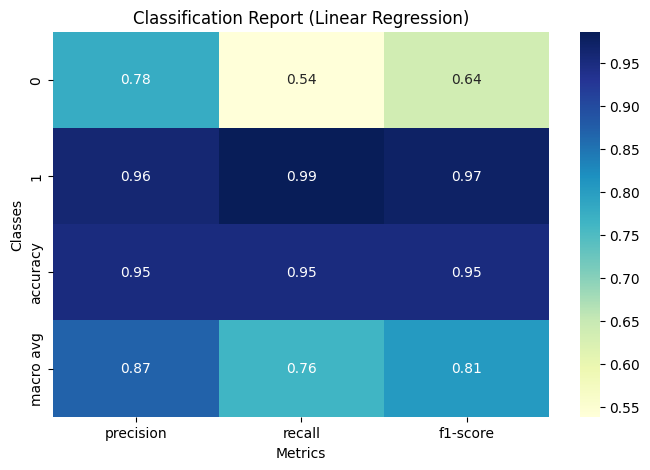

In [95]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

y_true_binary = (test_y > 0.5).astype(int)
classification_rep = classification_report(y_true_binary, y_pred_binary, output_dict=True)

class_rep_df = pd.DataFrame(classification_rep).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(class_rep_df.iloc[:-1, :-1].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report (Linear Regression)')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


In [25]:
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

**Loading the model saved during training**

In [26]:
from sklearn.preprocessing import StandardScaler
import pickle


loaded_model = pickle.load(open(filename, 'rb'))
scaler_feature = StandardScaler()
scaler_feature.fit(train_x)

scaled_data = scaler_feature.transform([[300,110,5,5,5,10,1]])
a = loaded_model.predict(scaled_data)
a

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.89509355])

In [27]:
scaler_test = StandardScaler()

**Input the Values**

In [28]:
gate_score = float(input("Enter the GRE score: "))
Toefl_score = float(input("Enter the TOEFL score: "))
rou = float(input("Enter the Rating of the university: "))
sop = float(input("Enter the SOP: "))
lor = float(input("Enter the LOR: "))
cgpa = float(input("Enter the CGPA: "))
rp = float(input("Enter the number of research papers: "))

Enter the GRE score: 320
Enter the TOEFL score: 120
Enter the Rating of the university: 4.8
Enter the SOP: 4.2
Enter the LOR: 3.8
Enter the CGPA: 8.5
Enter the number of research papers: 1


In [30]:
loaded_model = pickle.load(open(filename, 'rb'))
input_data = [[gate_score, Toefl_score, rou, sop, lor, cgpa, rp]]
# prediction=loaded_model.predict(([[320,120,5,5,5,9.2,1]]))
prediction = loaded_model.predict(input_data)
print(prediction[0])

0.7834002296283704


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Result**

In [31]:
print(f"Chances of Admission = {prediction[0]*100} %")

Chances of Admission = 78.34002296283704 %


In [32]:
scaler_feature.get_params(deep=True)

{'copy': True, 'with_mean': True, 'with_std': True}

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

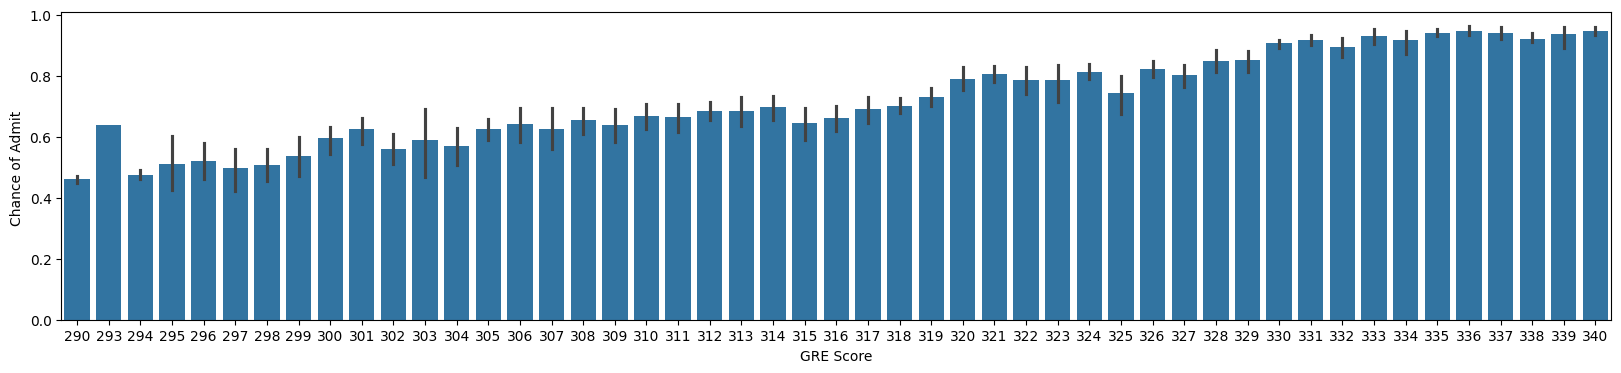

In [33]:
plt.subplots(figsize=(20,4))
sns.barplot(x="GRE Score",y="Chance of Admit ",data=df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

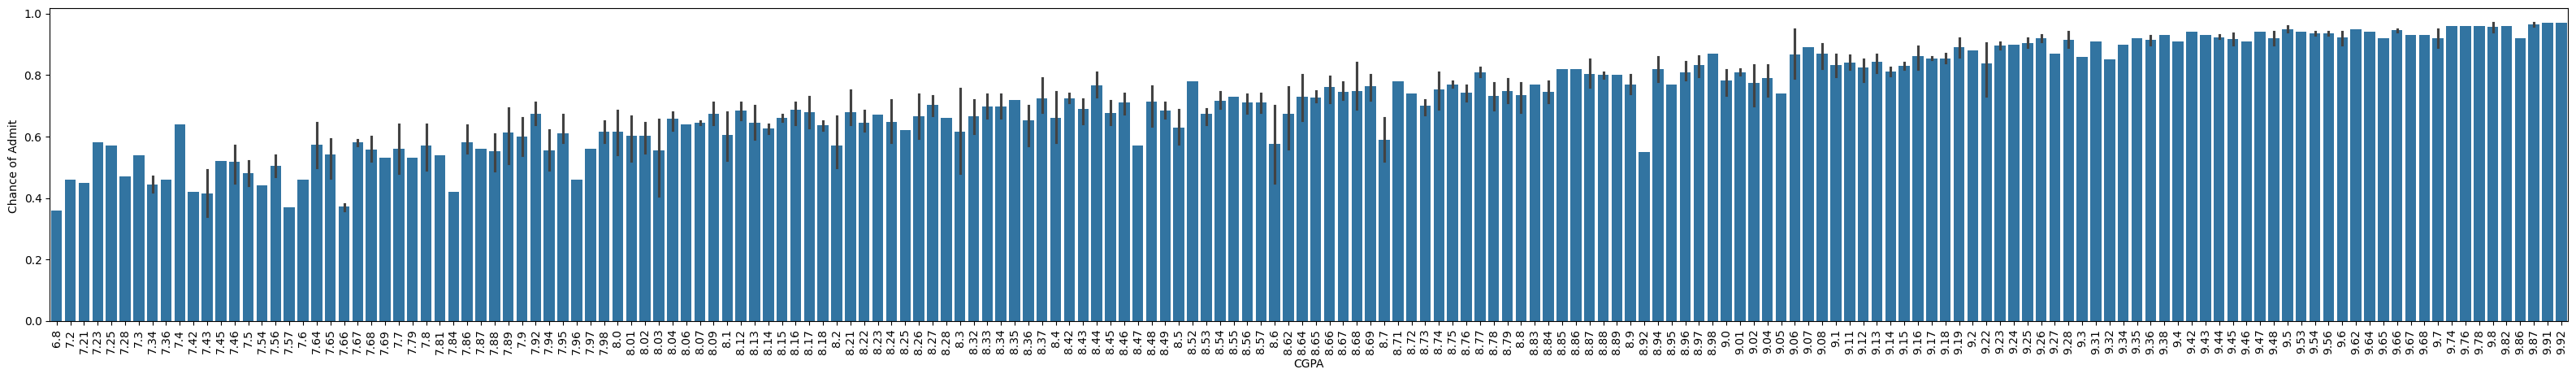

In [34]:
plt.subplots(figsize=(40,5))
sns.barplot(x="CGPA",y="Chance of Admit ",data=df)
plt.xticks(rotation=90)

**Random Forest**

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 101)
rfr.fit(train_x,train_y)
y_head_rfr = rfr.predict(test_x)

In [36]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(test_y, y_head_rfr))

r_square score:  0.7992665326834952


**Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 101)
dtr.fit(train_x,train_y)
y_head_dtr = dtr.predict(test_x)

In [38]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(test_y,y_head_dtr))

r_square score:  0.6338755649339403


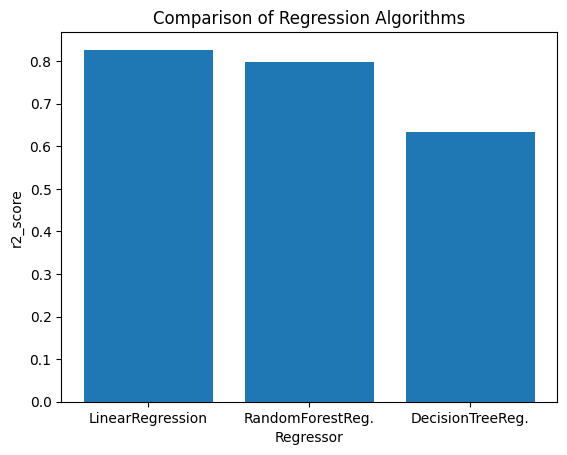

In [39]:
y = np.array([r2_score(test_y,y_pred),r2_score(test_y,y_head_rfr),r2_score(test_y,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

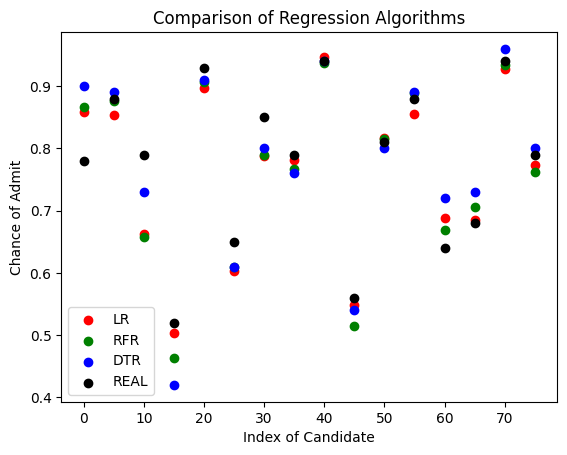

In [40]:
red = plt.scatter(np.arange(0,80,5),y_pred[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_head_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),test_y[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

Because most candidates in the data have over 70% chance, many unsuccessful candidates are not well predicted

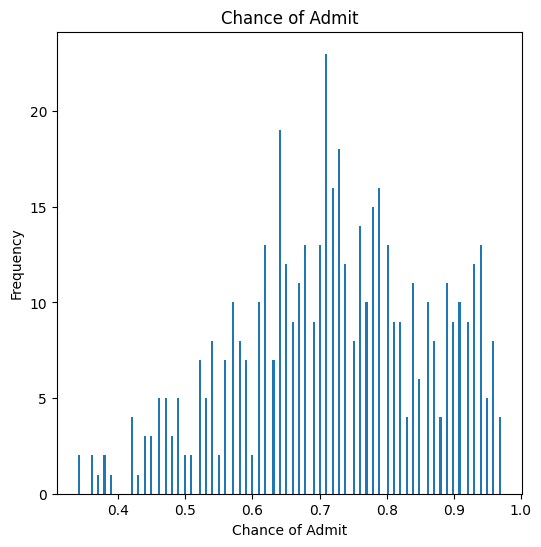

In [41]:
df["Chance of Admit "].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.show()

Prediction Models : Classification Algorithm (Supervised Machine Learning
1.  Logistic Regression
2.  Support Vector Machine
3.  Gaussian Naive Bayes
4.  Decision Tree Classification
5.  Random Forest Classification

**Preparing Data for Classification**

If a candidate's Chance of Admit is greater than 80%, the candidate will receive the 1 label.

If a candidate's Chance of Admit is less than or equal to 80%, the candidate will receive the 0 label.

In [42]:
df = pd.read_csv("/content/drive/MyDrive/ml_labs_sem6/admission_predict.csv")

In [43]:
df.shape

(500, 9)

In [44]:
# it may be needed in the future.
serialNo = df["Serial No."].values
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [45]:
X = df.drop(["Chance of Admit"],axis=1)
y = df["Chance of Admit"].values

In [46]:
# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [47]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

In [48]:
y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

**1.  Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train_01)

LogisticRegression()

In [50]:
y_predlogr = logr.predict(X_test)

In [51]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_predlogr, y_test_01))


Accuracy Score: 0.93


In [52]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_01,y_predlogr))
cm_lrc = confusion_matrix(y_test_01,y_predlogr)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

[[68  2]
 [ 5 25]]


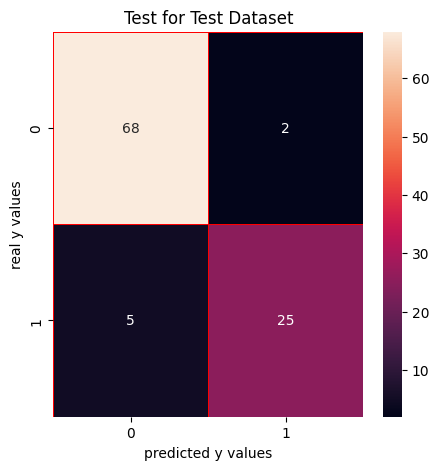

In [53]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [54]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_predlogr))
print("recall_score: ", recall_score(y_test_01, y_predlogr))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_predlogr))

precision_score:  0.9259259259259259
recall_score:  0.8333333333333334
f1_score:  0.8771929824561403


Test for Train Dataset

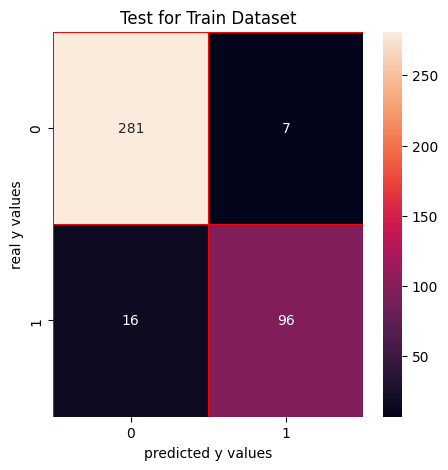

In [55]:
cm_lrc_train = confusion_matrix(y_train_01,logr.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

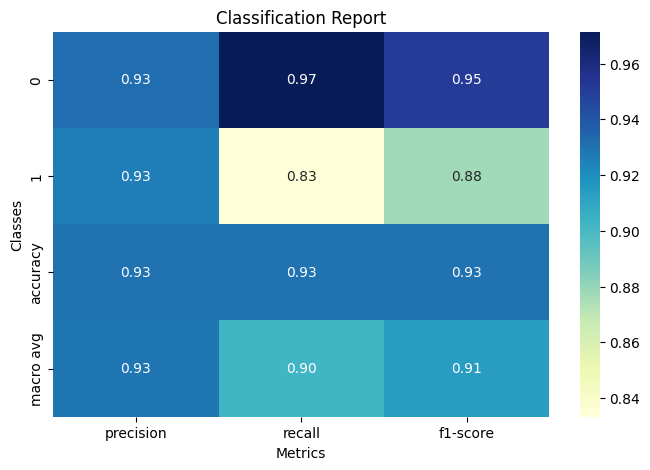

In [90]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

classification_rep = classification_report(y_test_01, y_predlogr)

class_rep_dict = classification_report(y_test_01, y_predlogr, output_dict=True)

class_rep_df = pd.DataFrame(class_rep_dict).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(class_rep_df.iloc[:-1, :-1].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

**2.  Support Vector Machine**

In [59]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train,y_train_01)
y_pred_svm = svm.predict(X_test)
print("score: ", svm.score(X_test,y_test_01))

score:  0.93


In [60]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_01,y_pred_svm)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_svm

array([[68,  2],
       [ 5, 25]])

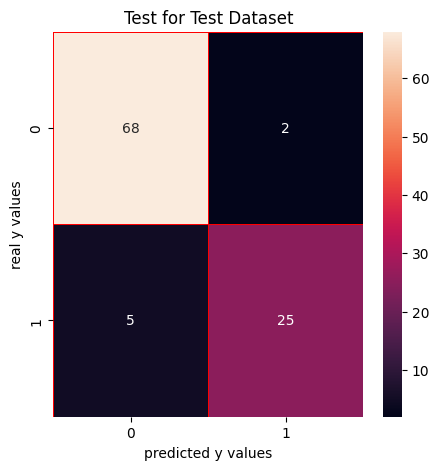

In [61]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [62]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_svm))
print("recall_score: ", recall_score(y_test_01,y_pred_svm))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_svm))

precision_score:  0.9259259259259259
recall_score:  0.8333333333333334
f1_score:  0.8771929824561403


Test for Train Dataset

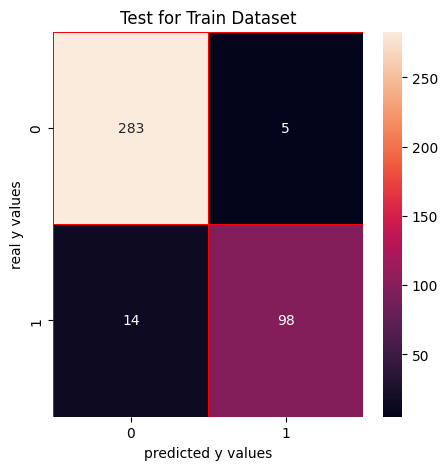

In [63]:
cm_svm_train = confusion_matrix(y_train_01, svm.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train, annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

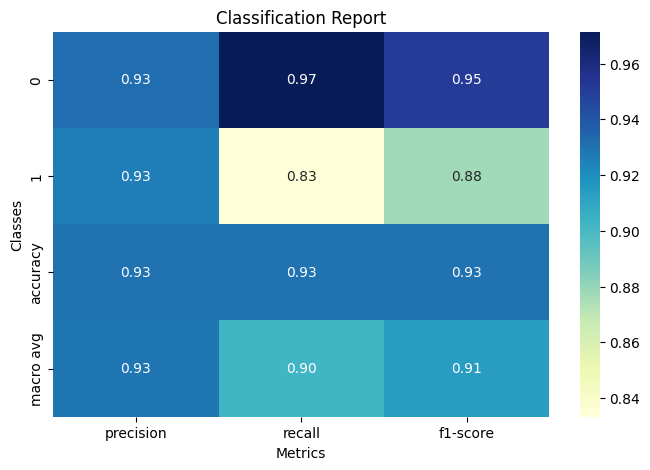

In [91]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

classification_rep = classification_report(y_test_01, y_pred_svm)

class_rep_dict = classification_report(y_test_01, y_pred_svm, output_dict=True)

class_rep_df = pd.DataFrame(class_rep_dict).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(class_rep_df.iloc[:-1, :-1].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

**3.  Gaussian Naive Bayes**

In [66]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train_01)
y_pred_nb = nb.predict(X_test)
print("score: ", nb.score(X_test,y_test_01))

score:  0.89


In [67]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test_01, y_pred_nb)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_nb

array([[62,  8],
       [ 3, 27]])

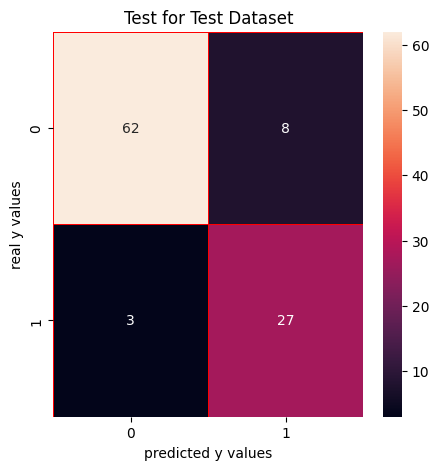

In [68]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [69]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_nb))
print("recall_score: ", recall_score(y_test_01,y_pred_nb))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_nb))

precision_score:  0.7714285714285715
recall_score:  0.9
f1_score:  0.8307692307692307


Test for Train Dataset

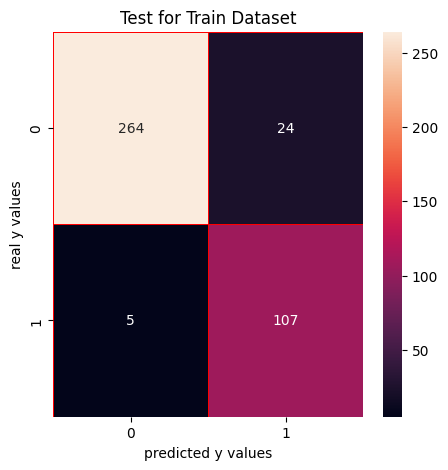

In [70]:
cm_nb_train = confusion_matrix(y_train_01,nb.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

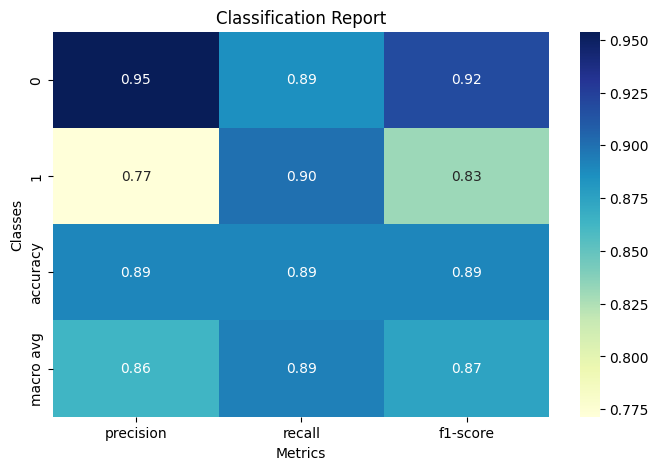

In [92]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

classification_rep = classification_report(y_test_01, y_pred_nb)

class_rep_dict = classification_report(y_test_01, y_pred_nb, output_dict=True)

class_rep_df = pd.DataFrame(class_rep_dict).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(class_rep_df.iloc[:-1, :-1].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

**4.  Decision Tree Classification**

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train_01)
y_pred_dtc = dtc.predict(X_test)
print("score: ", dtc.score(X_test,y_test_01))

score:  0.92


In [72]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01, y_pred_dtc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_dtc

array([[67,  3],
       [ 5, 25]])

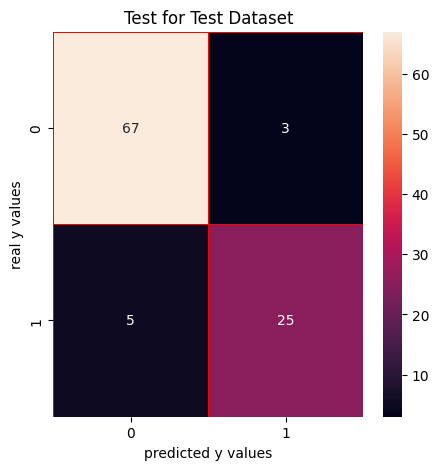

In [73]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [74]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_dtc))
print("recall_score: ", recall_score(y_test_01, y_pred_dtc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_dtc))

precision_score:  0.8928571428571429
recall_score:  0.8333333333333334
f1_score:  0.8620689655172413


Test for Train Dataset

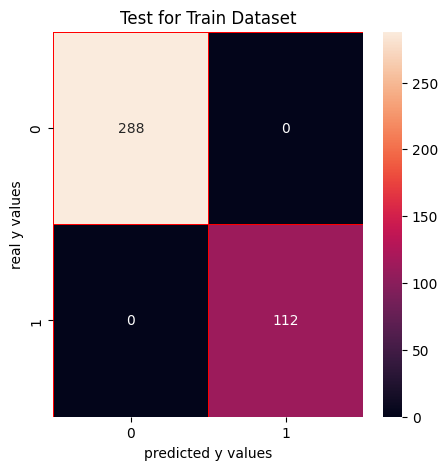

In [75]:
cm_dtc_train = confusion_matrix(y_train_01,dtc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

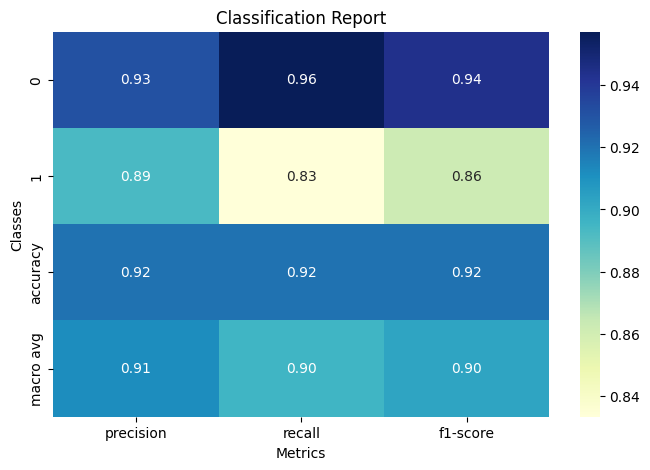

In [93]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

classification_rep = classification_report(y_test_01, y_pred_dtc)

class_rep_dict = classification_report(y_test_01, y_pred_dtc, output_dict=True)

class_rep_df = pd.DataFrame(class_rep_dict).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(class_rep_df.iloc[:-1, :-1].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

**5.  Random Forest Classification**

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state = 1)
rfc.fit(X_train,y_train_01)

y_pred_rfc = rfc.predict(X_test)

print("score: ", rfc.score(X_test, y_test_01))

score:  0.9


In [77]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test_01, y_pred_rfc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_rfc

array([[65,  5],
       [ 5, 25]])

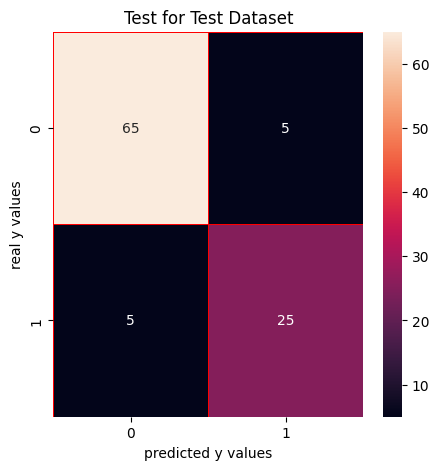

In [78]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [79]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_rfc))
print("recall_score: ", recall_score(y_test_01, y_pred_rfc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_rfc))

precision_score:  0.8333333333333334
recall_score:  0.8333333333333334
f1_score:  0.8333333333333334


Test for Train Dataset

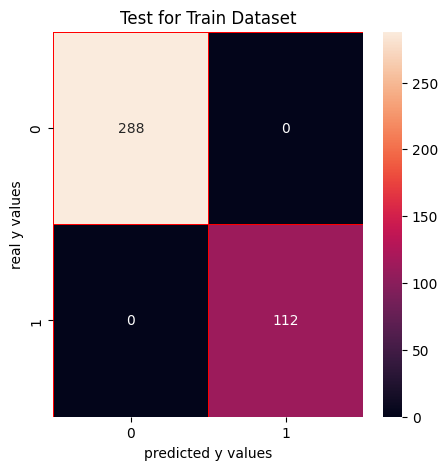

In [80]:
cm_rfc_train = confusion_matrix(y_train_01, rfc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

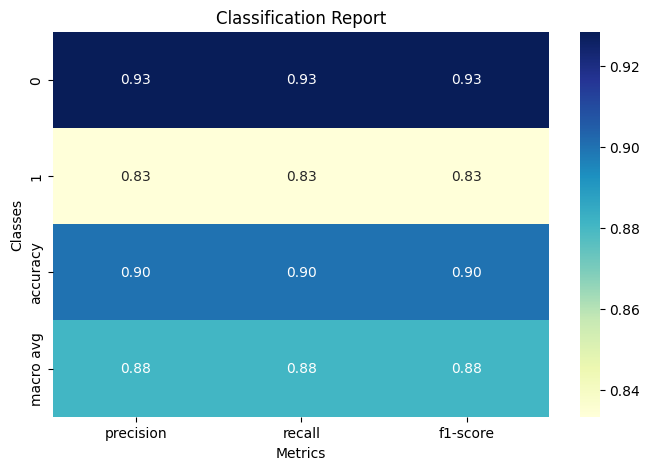

In [94]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

classification_rep = classification_report(y_test_01, y_pred_rfc)

class_rep_dict = classification_report(y_test_01, y_pred_rfc, output_dict=True)

class_rep_df = pd.DataFrame(class_rep_dict).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(class_rep_df.iloc[:-1, :-1].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

In [81]:
y = np.array([logr.score(X_test, y_test_01), svm.score(X_test, y_test_01), nb.score(X_test, y_test_01), dtc.score(X_test,y_test_01), rfc.score(X_test, y_test_01)])
print(y)

[0.93 0.93 0.89 0.92 0.9 ]


**Comparison of Classification Algorithms**

All classification algorithms achieved around 90% success. The most successful one is Logistic Regression and Support Vector Machine with 93% score.

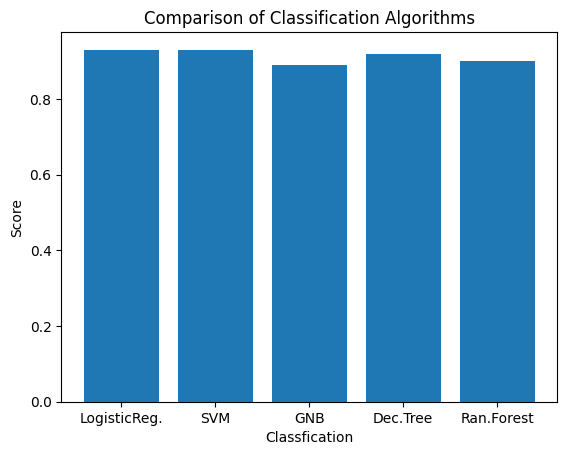

In [82]:
y = np.array([logr.score(X_test, y_test_01), svm.score(X_test, y_test_01), nb.score(X_test, y_test_01), dtc.score(X_test,y_test_01), rfc.score(X_test, y_test_01)])
#x = ["LogisticRegression","SVM","GaussianNB","DecisionTreeClassifier","RandomForestClassifier"]
x = ["LogisticReg.", "SVM", "GNB", "Dec.Tree", "Ran.Forest"]

plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")
plt.show()